# Project on Breast Cancer
## This project is to build a model that can predict if a breast cancer is benign or malignant

In [180]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('imported')

imported


In [181]:
#loading the dataset
df = pd.read_csv('data.csv')
df.head(25)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [182]:
df.shape

(569, 32)

In [183]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [184]:
#checking the data types of each column
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [185]:
#counting the data types present in the dataframe
df.dtypes.value_counts()


float64    30
int64       1
object      1
Name: count, dtype: int64

##### only one object data type is in the dataframe and that is the "Diagnosis" column, which is expected

In [186]:
df.isnull().sum().to_frame()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


#### we can see that there is no null values in any of the columns, so there is no need for data processing

## Since the data has been accurately processed, lets go ahead to exploratory analysis and build the model

In [187]:
#dropping column that can introduce noise to the model
df = df.drop('id', axis = 1)
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [188]:
#checking for class imbalance
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [189]:
#we have to labelencode the 'diagnosis' column
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['diagnosis'] = encode.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<h4>Let's check the correleration between features and the target and sort the values</h4>

In [190]:
corr_matrix = df.corr()['diagnosis'].sort_values()
corr_matrix

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave_points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave_points_mean        0

### now that all data are numeric and there is no class imbalance, let's train the model with the dataset

In [191]:
#getting the features and the target
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [192]:
#importing all model to determine which to use based on accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
print('all imported')

all imported


In [193]:
#storing all the models in a list
models = [RandomForestClassifier(random_state=0),
          GradientBoostingClassifier(),
          KNeighborsClassifier(),
          SVC(kernel='linear'),
          SVC(kernel='poly'),
          SVC(kernel='rbf'),
          SVC(kernel='sigmoid'),
          DecisionTreeClassifier(),
          LogisticRegression(max_iter = 1000)
]
#iterating through the models
for model in models:
    cv_score = cross_val_score(model, x, y, cv = 5)
    mean_cv_score = sum(cv_score)/len(cv_score)
    percentage_mean_cv_score = round((mean_cv_score * 100), 2) 
    print('The accuracy of ', model, 'is ', percentage_mean_cv_score, '%')
    print('.............................................................')

The accuracy of  RandomForestClassifier(random_state=0) is  96.49 %
.............................................................
The accuracy of  GradientBoostingClassifier() is  96.14 %
.............................................................
The accuracy of  KNeighborsClassifier() is  92.79 %
.............................................................
The accuracy of  SVC(kernel='linear') is  94.55 %
.............................................................
The accuracy of  SVC(kernel='poly') is  90.87 %
.............................................................
The accuracy of  SVC() is  91.22 %
.............................................................
The accuracy of  SVC(kernel='sigmoid') is  46.04 %
.............................................................
The accuracy of  DecisionTreeClassifier() is  92.79 %
.............................................................
The accuracy of  LogisticRegression(max_iter=1000) is  95.61 %
.........................

##### from the  cross check, we can see that the randomforestclassifier has the highest cv_score

In [194]:
#spllitting our dataset into training and test dataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0) 
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
percentage_acc_score = round((acc_score*100), 2)
print('The accuracy score of our model is ', percentage_acc_score, '%')


The accuracy score of our model is  96.51 %


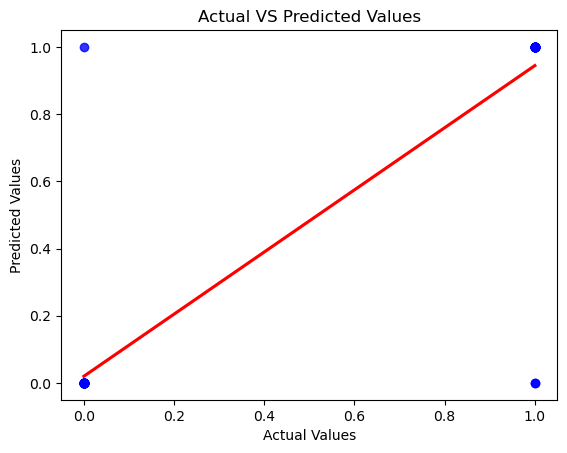

In [195]:
#visualizing the actual value vs the predicted value
plt.figure()
sns.regplot(x = y_test, y = y_pred, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color':'red'} )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual VS Predicted Values')
plt.show()

### Being that the model is trained to predict a critical situation, we have to use other evaluation metrics for certainty

In [196]:
from sklearn.metrics import precision_score, f1_score, recall_score 
per_precision = round((precision_score(y_test, y_pred)*100), 2)
per_f1 = round((f1_score(y_test, y_pred)*100), 2)
per_recall = round((recall_score(y_test, y_pred)*100), 2)
print('The precision score is ', per_precision, '%')
print('The f1 score is ', per_f1, '%')
print('The recall score is ', per_recall, '%')

The precision score is  97.14 %
The f1 score is  95.77 %
The recall score is  94.44 %


### The metrics are high, but let's conduct a hyperparameter tuning

In [197]:
#hypertuning of parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
#initialize the grid search
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5, n_jobs=-1, verbose =2)
#fitting the grid search
grid_search.fit(x_train, y_train)
print("The best parameters found: ", grid_search.best_params_)
print('The best estimator: ', grid_search.best_estimator_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best parameters found:  {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 200}
The best estimator:  RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=200)


In [198]:
#using the best estimator to predict
y_pred = grid_search.best_estimator_.predict(x_test)
score = round((accuracy_score(y_test, y_pred)*100), 2)
print('The accuracy score of the model after hyperparameter tuning is: ', score,'%')


The accuracy score of the model after hyperparameter tuning is:  97.67 %


In [199]:
#testing the model with an unseen data
num_columns = x.shape[1]
min = x.min()
max = x.max()
input_data = np.random.randint(low = min, high = max, size = num_columns)
input_data_array=  np.asarray(input_data)
reshaped_data =  input_data_array.reshape(1, -1)
predictions = grid_search.best_estimator_.predict(reshaped_data)
if predictions == 0:
    print('This breast cancer is benign')
else:
    print('This breast cancer is malignant')

This breast cancer is malignant
